<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
This kernel is the continuation of **[30 Days of EDA](https://www.kaggle.com/discussions/general/442602)** learning series.If you are new here, you might want to check out the **[30 days of EDA - Week I](https://www.kaggle.com/code/prasad22/30-days-of-eda-week-i)**. Key focus would be towards Text oriented 
exploration and preprocessing ideas in this notebook.
    
<h1 align="left"><font color=orange> Table of Contents</font></h1>

<h2 align="left"><font color=violet> Week II</font></h2>

- [Day 8 : Basic Text data preprocessing](#Day-8-:-Basic-Text-data-preprocessing)
- [Day 9 : Engineering New Text Features](#Day-9-:-Engineering-New-Text-Features)
- [Day 10 : Masked Wordcloud](#Day-10-:-Masked-Wordcloud)
- [Day 11 : Sentiment Analysis](#Day-11-:-Sentiment-Analysis)
- [Day 12 : Feature Extraction Using Regular Expressions](#Day-12-:-Feature-Extraction-Using-Regular-Expressions)
- [Day 13 : Feature Extraction Using POS Tagging](#Day-13-:-Feature-Extraction-Using-POS-Tagging)
- [Day 14 : Finding Textual Similarity](#Day-14-:-Finding-Textual-Similarity)    

In [1]:
#Dependencies
# !pip install nltk
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.9 MB/s eta 0:00:00


# **<span style='color:skyblue'>Day 8 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Basic Text data preprocessing</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

Text data preprocessing is an essential step in natural language processing (NLP) tasks. Here's a simple Python function that performs basic text data preprocessing using the popular NLTK library. This function includes common preprocessing steps such as lowercasing, tokenization, removing stopwords, and stemming:

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

import contractions
import re

nltk.download('punkt')

pd.set_option("display.max_columns",None)

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words using spaCy
    doc = nlp(" ".join(words))
    lemmatized_words = [token.lemma_ for token in doc]
    
    # Join the lemmatized words back into a single string
    preprocessed_text = ' '.join(lemmatized_words)
    
    return preprocessed_text

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Applying it on a NLP/Text Dataset Ex. California Independent Medical Review Dataset
ca_med_rev = pd.read_csv("/kaggle/input/ca-independent-medical-review/Independent_Medical_Review__IMR__Determinations__Trend.csv")
ca_med_rev.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [4]:
#Original Text
ca_med_rev["Findings"][22]

'Nature of Statutory Criteria/Case Summary: An enrollee has requested breast tomosynthesis for evaluation of her medical condition.   Findings:  Two physician reviewers found that in the peer-reviewed medical literature, Skaane and colleagues found that the addition of three dimensional digital breast tomosynthesis to two dimensional full field digital mammography “resulted in a significantly higher cancer detection rate and enabled the detection of more invasive cancers.” Thus, although additional studies are needed to confirm these findings, there is adequate data to support the utility of three dimensional digital breast tomosynthesis in this clinical setting. In this case, an additional study was indicated to confirm the abnormal findings seen on a previous study. For these reasons, breast tomosynthesis on both dates in question were likely to be more beneficial for evaluation of this patient’s medical condition than any available standard therapy. Final Result: Two reviewers deter

In [5]:
#Preprocessed text
preprocessed_text = preprocess_text(ca_med_rev["Findings"][22])
print(preprocessed_text)

nature statutory criteriacase summary enrollee request breast tomosynthesis evaluation medical condition finding two physician reviewer find peerreviewe medical literature skaane colleague find addition three dimensional digital breast tomosynthesis two dimensional full field digital mammography result significantly high cancer detection rate enable detection invasive cancer thus although additional study need confirm finding adequate datum support utility three dimensional digital breast tomosynthesis clinical setting case additional study indicate confirm abnormal finding see previous study reason breast tomosynthesis date question likely beneficial evaluation patient medical condition available standard therapy final result two reviewer determine diagnostic procedure issue likely beneficial evaluation patient medical condition available standard therapy therefore health plan denial overturn credentialsqualification three reviewer board certify diagnostic radiology actively practice 

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
    
This function first converts the input text to lowercase, tokenizes it into words, removes common English stopwords, and then stems the remaining words using the Porter Stemmer algorithm. The preprocessed text is then returned as a single string.

You can modify this function or add additional preprocessing steps depending on your specific NLP task and requirements.

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 9 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Engineering New Text Features</span>**

In [6]:
import seaborn as sns
sns.set_style('white')

#Loading Dataset - Job Vacancy Tweets Dataset
job_tweets = pd.read_csv('/kaggle/input/job-vacancy-tweets/Job_Tweets.csv')
job_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                50000 non-null  int64 
 1   Timestamp         50000 non-null  object
 2   User              50000 non-null  object
 3   Text              50000 non-null  object
 4   Hashtag           40684 non-null  object
 5   Retweets          50000 non-null  int64 
 6   Likes             50000 non-null  int64 
 7   Replies           50000 non-null  int64 
 8   Source            50000 non-null  object
 9   Location          44011 non-null  object
 10  Verified_Account  50000 non-null  bool  
 11  Followers         50000 non-null  int64 
 12  Following         50000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 4.6+ MB


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

def text_feature_engineering(df,column_name):
    # Calculate word count
    df['word_count'] = df[column_name].apply(lambda x: len(str(x).split(" ")))

    # Calculate character count
    df['char_count'] = df[column_name].str.len()

    # Define a function to calculate average word length
    def avg_word(sentence):
        words = sentence.split()
        return (sum(len(word) for word in words) / max(len(words), 1))

    # Calculate average word length
    df['avg_word'] = df[column_name].apply(lambda x: avg_word(x))

    # Load stopwords and calculate the number of stopwords
    stop = text.ENGLISH_STOP_WORDS
    df['stopwords'] = df[column_name].apply(lambda x: len([x for x in x.split() if x in stop]))

    # Calculate the number of hashtags
    df['hashtags'] = df[column_name].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

    # Calculate the number of numeric words
    df['numerics'] = df[column_name].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

    # Calculate the number of uppercase words
    df['upper'] = df[column_name].apply(lambda x: len([x for x in x.split() if x.isupper()]))

    return df

In [8]:
job_tweets = text_feature_engineering(job_tweets,column_name="Text")
job_tweets.shape

(50000, 20)

In [9]:
job_tweets.sample()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
22628,1473358483848314884,2021-12-21 18:23:30+00:00,ExtraSpaceJob,We are #hiring Assistant Store Manager in Hyat...,"['hiring', 'jobs', 'Hyattsville']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Salt Lake City, UT",False,51,23,12,100,7.416667,2,3,0,1


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
We have added 7 basic and commonly drawn features from text data. As an assignment you can try calculating TF-IDF for each datapoint which would be another insightful feature to have.    

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 10 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Masked Wordcloud</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

A `"masked word cloud"` is a type of word cloud visualization where the words are displayed within the contours or boundaries of a specific shape or image, instead of the traditional rectangular or cloud-shaped word cloud. This technique allows you to create more visually appealing and contextually relevant word clouds by arranging words in a predefined pattern or shape.

Here's why you might want to create a masked word cloud:

**Visual Appeal**: Masked word clouds can be more visually appealing and engaging compared to traditional word clouds. By using custom shapes and images, you can make your word cloud more aesthetically pleasing.

**Contextual Relevance**: When you use a specific shape or image as a mask, you can make the word cloud relevant to a particular topic or concept. For example, if you're analyzing customer reviews of a restaurant, you can create a word cloud in the shape of a plate or fork to emphasize food-related terms.

In [10]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

def generate_masked_wordcloud(text_data, mask_image_path, stopwords=None):
    # Load the mask image
    background = np.array(Image.open(mask_image_path))

    # Define stopwords
    if stopwords is None:
        stopwords = set(STOPWORDS)

    # Generate the word cloud
    wordcloud = WordCloud(
        stopwords=stopwords,
        collocations=False,
        background_color='white',
        min_font_size=0.1,
        mask=background
    ).generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(5,5))
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


In [11]:
# Applying it on FPL Tweets Dataset
fpl_tweets = pd.read_csv("/kaggle/input/fpl-tweets-dataset/FPL_tweets.csv")
fpl_tweets.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453


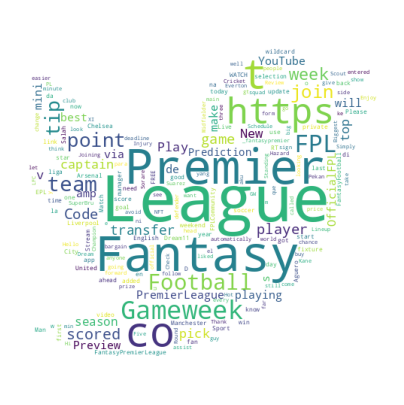

In [12]:
word_string = ' '.join(fpl_tweets['Text'].astype("str").values)
generate_masked_wordcloud(word_string, '/kaggle/input/twittermask/twitter_mask3.jpg')

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

This example demonstrates how to create a basic masked word cloud. You can further customize it by adjusting the parameters and styles to match your preferences and the specific context of your data.

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 11 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Sentiment Analysis</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Writing a function to read text from a DataFrame column and create a new column based on sentiment analysis using the **`VADER (Valence Aware Dictionary and sEntiment Reasoner)`** sentiment analysis tool.

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (run this once)
nltk.download('vader_lexicon')

def add_sentiment_and_polarity_columns(dataframe, text_column, sentiment_column='Sentiment', polarity_column='Sentiment_Polarity'):

    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    
    # Calculate sentiment scores for each row in the text column
    dataframe[sentiment_column] = dataframe[text_column].apply(lambda x: sia.polarity_scores(x)['compound'])
    
    # Allocate sentiment polarities (positive, negative, or neutral)
    dataframe[polarity_column] = dataframe[sentiment_column].apply(lambda score: 'positive' if score > 0.1 else 'negative' if score < -0.1 else 'neutral')
    
    return dataframe

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
add_sentiment_and_polarity_columns(fpl_tweets,'Text').sample(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Sentiment,Sentiment_Polarity
19932,3.905400e+17,2013-10-16 18:09:38+00:00,f3ranmi_,EA SPORTS? launch league for Fantasy managers:...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,False,757,422,0.7783,positive
95718,1.430150e+18,2021-08-24 12:32:15+00:00,iantwang,Not sure how many of you are a) Joanna Newsom ...,NaN,0,13,2,"<a href=""http://twitter.com/download/android"" ...",London,False,2932,893,0.7596,positive
21099,5.434100e+17,2014-12-12 14:18:54+00:00,GuidoJesus,Tuve que poner al guevon de Diego Costa en muy...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Barquisimeto, Venezuela",False,444,777,-0.4939,negative
57185,9.139330e+17,2017-09-30 01:05:23+00:00,sepakinfo,Pemain-Pemain Alternatif Pengganti Aguero di F...,NaN,0,0,0,"<a href=""https://www.google.com/"" rel=""nofollo...",NaN,False,204,21,0.0000,neutral
102585,1.580950e+18,2022-10-14 15:36:34+00:00,Ryan_ms28,🚨We are Live!!! 🚨\n\nFPL Gameweek 11 Deadline ...,"['fpl', 'FPLCommunity', 'gw11']",0,2,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Sydney, New South Wales",False,1272,1571,0.0000,neutral


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
- Calculated sentiment scores using the VADER sentiment analyzer and stored them in the Sentiment column.
- Introduce a column called Sentiment_Polarity, where we allocate sentiment polarities based on the sentiment scores. Sentiments with a score greater than 0.1 are considered "positive," those below -0.1 are "negative," and the rest are labeled as "neutral."
    
    
This approach allows you to categorize the sentiment of each text as either positive, negative, or neutral in an additional column in the DataFrame.

In [15]:
# Applying it on FPL Tweets Dataset
round(fpl_tweets.Sentiment_Polarity.value_counts(normalize=True)*100,1).reset_index()

,Sentiment_Polarity,proportion
0,neutral,53.7
1,positive,34.8
2,negative,11.4


([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 12 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Feature Extraction Using Regular Expressions</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Here's a Python function that takes a DataFrame and a text column as input parameters, and generates new features using regular expressions to analyze different patterns and perform other regex operations.This function defines several regex patterns and corresponding feature names and applies them to each text column in the input DataFrame. It counts the occurrences of patterns like digits, uppercase letters, lowercase letters, short words, mentions, and hashtags in the text columns and adds these counts as new features to the DataFrame.

You can customize the regex patterns and feature names based on your specific requirements and add more patterns as needed.    

In [16]:
# You need to download the NLTK POS tagger data before using it:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def generate_regex_and_pos_features(dataframe, text_column):
    # Create a new DataFrame to store the generated features
    new_dataframe = dataframe.copy()
    
    # Define the regular expressions and corresponding feature names
    regex_patterns = [
        (r'\d+', 'num_digits'),                 # Number of digits
        (r'[A-Z]+', 'num_uppercase_letters'),   # Number of uppercase letters
        (r'[a-z]+', 'num_lowercase_letters'),   # Number of lowercase letters
        (r'\b\w{1,3}\b', 'short_words'),       # Number of short words (1-3 characters)
        (r'@\w+', 'mentions'),                 # Number of mentions (e.g., @username)
        (r'#\w+', 'hashtags'),                 # Number of hashtags (e.g., #topic)
        (r'\bhttps?://\S+\b', 'num_links'),    # Number of links
    ]
    
    # Loop through each regex pattern and apply it to the specified text column
    for pattern, feature_name in regex_patterns:
        new_col_name = f"{text_column}_{feature_name}"
        new_dataframe[new_col_name] = dataframe[text_column].apply(lambda x: len(re.findall(pattern, str(x))))
    
    # Additional feature: Total character count
    new_dataframe[f"{text_column}_total_chars"] = dataframe[text_column].apply(lambda x: len(str(x)))
    new_dataframe[f"{text_column}_pos_tags"] = dataframe[text_column].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(str(x))))
    
    return new_dataframe

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
# Original shape of the DataFrame before applying the custom function
original_shape = job_tweets.shape

# Apply your custom function to generate new features on Job Vacancy Tweets Dataset
new_df = generate_regex_and_pos_features(job_tweets,"Text")

# Shape of the DataFrame after applying the custom function
new_shape = new_df.shape

# Print the original and new shapes
print("Original Shape:", original_shape)
print("New Shape:", new_shape)

Original Shape: (50000, 20)
New Shape: (50000, 29)


In [18]:
# Checking the head of the last 9 columns and the "Text" column
pd.concat([new_df.iloc[:, -9:], new_df["Text"]], axis=1).head().set_index(["Text"])

,Text_num_digits,Text_num_uppercase_letters,Text_num_lowercase_letters,Text_short_words,Text_mentions,Text_hashtags,Text_num_links,Text_total_chars,Text_pos_tags
Text,,,,,,,,,
Looking for an exciting job where you can ski for FREE at 7 ski areas? We are still hiring for the winter season! Learn more here: https://t.co/imMnymMfwW https://t.co/sIG8M3EK8A,4,11,34,18,0,0,2,178,"[(Looking, VBG), (for, IN), (an, DT), (excitin..."
Hail in Phoenix - no way! New opportunity at Freedom? Possibly. We are hiring a(n) Reconciliation Specialist II and would like to talk to you!\nhttps://t.co/CFAKKQHeFJ #job,0,11,29,17,0,1,1,172,"[(Hail, NNP), (in, IN), (Phoenix, NNP), (-, :)..."
Rackspace is hiring! We are looking for National Partner Manager. Learn more or Jobvite a friend. #becomearacker #Rackspace #recruiting #talentacquisition #jobsearching\nhttps://t.co/XuSMG0eSgs #job,1,11,28,9,0,6,1,197,"[(Rackspace, NN), (is, VBZ), (hiring, VBG), (!..."
"We are #hiring Administrative Assistant in Nanuet, NY https://t.co/3IGxFiCXUI #jobs #Nanuet",1,9,14,6,0,3,1,91,"[(We, PRP), (are, VBP), (#, #), (hiring, VBG),..."
"We are #hiring Family Service Counselor in Irvine, CA https://t.co/XAianPE9mX #jobs #Irvine",1,10,15,6,0,3,1,91,"[(We, PRP), (are, VBP), (#, #), (hiring, VBG),..."


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
You can further customize this function by adding more regex patterns and corresponding feature names based on your specific needs. These patterns can be used to extract various information like email addresses, phone numbers, special characters, or any other patterns relevant to your text data.    

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 13 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Feature Extraction Using POS Tagging</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
incorporating POS-based features into your NLP and text-related machine learning pipelines can help your models better understand and process text data, leading to improved performance and more meaningful insights from the data. However, the effectiveness of these features depends on the specific task and dataset, so it's essential to experiment and evaluate their impact on your particular problem.
    
    
The function I provided for creating new features based on POS tags is a common preprocessing step in natural language processing (NLP) and text-related data science/machine learning problems.    

In [19]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Function to create new features based on POS tags
def create_pos_features(dataframe, text_column):
    # Tokenize and perform POS tagging for each row in the text column
    pos_tags = dataframe[text_column].apply(lambda x: pos_tag(word_tokenize(x)))

    # Define a mapping of POS abbreviations to descriptive names
    pos_mapping = {
        'CC': 'Coordinating Conjunction',
        'CD': 'Cardinal Digit',
        'DT': 'Determiner',
        'EX': 'Existential There',
        'FW': 'Foreign Word',
        'IN': 'Preposition or Subordinating Conjunction',
        'JJ': 'Adjective',
        'JJR': 'Adjective, Comparative',
        'JJS': 'Adjective, Superlative',
        'LS': 'List Item Marker',
        'MD': 'Modal',
        'NN': 'Noun, Singular',
        'NNS': 'Noun, Plural',
        'NNP': 'Proper Noun, Singular',
        'NNPS': 'Proper Noun, Plural',
        'PDT': 'Predeterminer',
        'POS': 'Possessive Ending',
        'PRP': 'Personal Pronoun',
        'PRP$': 'Possessive Pronoun',
        'RB': 'Adverb',
        'RBR': 'Adverb, Comparative',
        'RBS': 'Adverb, Superlative',
        'RP': 'Particle',
        'SYM': 'Symbol',
        'TO': 'To',
        'UH': 'Interjection',
        'VB': 'Verb, Base Form',
        'VBD': 'Verb, Past Tense',
        'VBG': 'Verb, Gerund or Present Participle',
        'VBN': 'Verb, Past Participle',
        'VBP': 'Verb, Non-3rd Person Singular Present',
        'VBZ': 'Verb, 3rd Person Singular Present',
        'WDT': 'Wh-Determiner',
        'WP': 'Wh-Pronoun',
        'WP$': 'Possessive Wh-Pronoun',
        'WRB': 'Wh-Adverb'
    }

    # Create new columns based on the mapping
    for pos, descriptive_name in pos_mapping.items():
        column_name = f'POS_{descriptive_name}'
        dataframe[column_name] = pos_tags.apply(lambda x: len([tag for word, tag in x if tag == pos]))

    return dataframe

In [20]:
# Apply the function to create new features in Internet Movie Script Dataset based on POS tags
movie_script = pd.read_excel("/kaggle/input/the-internet-movie-script-dataset/The Internet Movie Script Dataset .xlsx")
movie_script.head()

,Sr.No,Movie,Writers,Genre,Date,Sript
0,1,9,"Pamela Pettler,Shane Acker","Animation,Adventure,Drama,Fantasy,Sci-Fi",September_2009,",SEQ.,05,-,PROLOGUE\n,,,,,\n,,,,,,The,Focus,Fe..."
1,2,A Scanner Darkly,Charlie Kaufman,"Animation,Crime,Drama",July_2006,"SHOT,OF,NOTEBOOK,PAGE,DAPPLED,WITH,SUNLIGHT\n\..."
2,3,Aladdin,"Roger Allers,Ron Clements","Animation,Family,Musical,Fantasy,Comedy",December_1992,"PEDDLER:,,Oh,I,come,from,a,land\n,,From,a,fara..."
3,4,Anastasia,"Susan Gauthier,Bruce Graham","Family,Animation,Musical",December_1997,"FADE,IN:\n\non,a,well-worn,PHOTOGRAPH,ALBUM.,A..."
4,5,Antz,"Todd Alcott,Chris Weitz,Paul Weitz","Adventure,Animation,Comedy,Fantasy",NaN,"Z,(O.S.)\n,,,,,,,,,,,(over,a,dark,screen)\n,,,..."


In [21]:

sample_data = create_pos_features(movie_script.sample(5), 'Sript')

# Display the updated DataFrame
sample_data

,Sr.No,Movie,Writers,Genre,Date,Sript,POS_Coordinating Conjunction,POS_Cardinal Digit,POS_Determiner,POS_Existential There,POS_Foreign Word,POS_Preposition or Subordinating Conjunction,POS_Adjective,"POS_Adjective, Comparative","POS_Adjective, Superlative",POS_List Item Marker,POS_Modal,"POS_Noun, Singular","POS_Noun, Plural","POS_Proper Noun, Singular","POS_Proper Noun, Plural",POS_Predeterminer,POS_Possessive Ending,POS_Personal Pronoun,POS_Possessive Pronoun,POS_Adverb,"POS_Adverb, Comparative","POS_Adverb, Superlative",POS_Particle,POS_Symbol,POS_To,POS_Interjection,"POS_Verb, Base Form","POS_Verb, Past Tense","POS_Verb, Gerund or Present Participle","POS_Verb, Past Participle","POS_Verb, Non-3rd Person Singular Present","POS_Verb, 3rd Person Singular Present",POS_Wh-Determiner,POS_Wh-Pronoun,POS_Possessive Wh-Pronoun,POS_Wh-Adverb
3,4,Anastasia,"Susan Gauthier,Bruce Graham","Family,Animation,Musical",December_1997,"FADE,IN:\n\non,a,well-worn,PHOTOGRAPH,ALBUM.,A...",147,8,419,6,4,472,153,7,3,0,35,703,212,898,1,0,18,361,66,324,1,0,6,1,123,53,129,58,96,46,70,220,12,32,0,16
6,7,Boxtrolls The,"Irena Brignull,Adam Pava","Animation,Adventure,Comedy",September_2014,EXT. CHEESEBRIDGE ALLEY - NIGHT\n ...,114,36,340,1,0,352,157,4,2,0,15,462,201,608,1,3,17,126,83,96,1,1,30,0,47,4,65,27,76,40,77,142,9,3,0,8
4,5,Antz,"Todd Alcott,Chris Weitz,Paul Weitz","Adventure,Animation,Comedy,Fantasy",NaN,"Z,(O.S.)\n,,,,,,,,,,,(over,a,dark,screen)\n,,,...",56,36,296,16,16,301,195,11,4,0,31,609,163,540,1,0,28,274,51,274,1,0,3,0,84,133,132,63,127,48,123,106,3,21,0,13
36,37,TMNT,Kevin Munroe,"Animation,Action,Adventure,Comedy,Drama,Fantasy",August_2005,FADE IN:\n\n \n\n \n\n ...,82,71,321,3,1,319,163,4,1,0,18,498,116,700,1,1,25,155,46,147,3,0,37,0,51,4,62,27,63,31,71,181,4,12,0,3
26,27,Mulan,Robert D. San Souci,"Family,Animation,Comedy,Musical,Adventure",December_1998,[Chinese guard is seen walking on The Great Wa...,204,65,523,5,0,566,326,2,7,0,78,1108,185,1107,1,4,54,370,204,224,3,3,88,0,179,12,282,56,228,42,171,315,3,29,0,16


In [22]:
movie_script.shape

(50, 6)

In [23]:
sample_data.columns.values

array(['Sr.No', 'Movie', 'Writers', 'Genre', 'Date', 'Sript',
       'POS_Coordinating Conjunction', 'POS_Cardinal Digit',
       'POS_Determiner', 'POS_Existential There', 'POS_Foreign Word',
       'POS_Preposition or Subordinating Conjunction', 'POS_Adjective',
       'POS_Adjective, Comparative', 'POS_Adjective, Superlative',
       'POS_List Item Marker', 'POS_Modal', 'POS_Noun, Singular',
       'POS_Noun, Plural', 'POS_Proper Noun, Singular',
       'POS_Proper Noun, Plural', 'POS_Predeterminer',
       'POS_Possessive Ending', 'POS_Personal Pronoun',
       'POS_Possessive Pronoun', 'POS_Adverb', 'POS_Adverb, Comparative',
       'POS_Adverb, Superlative', 'POS_Particle', 'POS_Symbol', 'POS_To',
       'POS_Interjection', 'POS_Verb, Base Form', 'POS_Verb, Past Tense',
       'POS_Verb, Gerund or Present Participle',
       'POS_Verb, Past Participle',
       'POS_Verb, Non-3rd Person Singular Present',
       'POS_Verb, 3rd Person Singular Present', 'POS_Wh-Determiner',
       

In [24]:
sample_data.shape

(5, 42)

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
We just created 36 new features using **`create_pos_features`** function. It helps in several ways. A few are listed below:

**Feature Engineering**: POS tagging provides valuable linguistic information about words in a text, such as whether a word is a noun, verb, adjective, etc. By creating new features based on POS tags, you can capture linguistic patterns and structures in the text data.

**Information Extraction**: For tasks like named entity recognition (NER) or extracting specific information from text, POS tags can be used to identify relevant phrases or entities. For example, you can use POS tags to identify proper nouns (e.g., names of people, organizations) in a text.

**Text Summarization**: When generating summaries of long texts, you might want to retain specific types of words (e.g., nouns and verbs) to ensure the summary captures essential information. POS-based features can assist in this process.

**Text Understanding**: POS tags can help you gain a deeper understanding of the text's structure and meaning. For example, you can analyze the distribution of verbs and nouns in a corpus to identify predominant actions or topics.

**Data Exploration**: Creating these features can also serve as a useful exploratory data analysis (EDA) step. You can visualize or analyze the distribution of POS tags in your dataset to gain insights into the language characteristics.

**Improving Model Performance**: In many NLP tasks, including POS-based features can lead to improved model performance. Models can learn to recognize patterns in the distribution of POS tags that are relevant to the task.    

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 14 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Finding Textual Similarity</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Textual similarity is a fundamental concept in natural language processing (NLP) and text analysis, with a broad range of applications such as Information Retrieval, Duplicate Detection, Plagiarism Detection, Text Summarization, Machine Translation, Question Answering, Text Classification, Content Recommendation, Clustering and Grouping, and many many more... 
    
Writing a function, **`calculate_text_similarity`**, which accepts a DataFrame, the name of the text column, and a list of similarity metrics to calculate. It returns a dictionary containing similarity matrices for each specified metric. You can customize the input DataFrame, text column name, and the list of similarity metrics according to your needs. 
    
Applying it on Constitution Datasets to see what is the similarity between Preambles of different countries.    

In [25]:
# Loading Constitution Dataset
constitutions = pd.read_csv("/kaggle/input/constitution-dataset/Constitution Dataset.csv")

constitutions.sample(3)

,Country,Year Enacted,Scope,Length (in Words),Executive Power,Legislative Power,Judicial Independence,Number of Rights,Preamble
72,Honduras,1982,0.69,"23,434",4,0.33,4,68,"We, the representatives elected by the soverei..."
182,United Kingdom,1215,0.43,"54,408",0,0.09,3,44,Magna Carta 1297 THE GREAT CHARTER OF THE LIBE...
140,Rwanda,2003,0.63,"16,940",6,0.33,4,53,"We, the People of Rwanda,In the wake of the g..."


In [26]:
constitutions.isna().sum()

Country                   0
Year Enacted              0
Scope                     0
Length (in Words)         0
Executive Power           0
Legislative Power         0
Judicial Independence     0
Number of Rights          0
Preamble                 31
dtype: int64

In [27]:
#Dropping the rows of missing Preamble for learning purpose and taking random 10 datapoints as sample
constitutions = constitutions.dropna()
constitutions = constitutions.sample(5)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import jaccard_score

def calculate_text_similarity(df, text_column, similarity_metrics=["tfidf", "cosine", "jaccard", "euclidean"]):

    # Initialize TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])

    similarity_results = {}

    if "tfidf" in similarity_metrics:
        # Calculate TF-IDF similarity between texts
        tfidf_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
        similarity_results["tfidf_similarity"] = pd.DataFrame(tfidf_similarities, columns=df.index, index=df.index)

    if "cosine" in similarity_metrics:
        # Calculate cosine similarity between texts
        cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
        similarity_results["cosine_similarity"] = pd.DataFrame(cosine_similarities, columns=df.index, index=df.index)

    if "jaccard" in similarity_metrics:
        # Calculate Jaccard similarity between texts
        def jaccard_similarity(x, y):
            intersection = len(set(x.split()).intersection(set(y.split())))
            union = len(set(x.split()).union(set(y.split())))
            return intersection / union

        jaccard_similarities = [[jaccard_similarity(df[text_column].iloc[i], df[text_column].iloc[j]) for i in range(len(df))] for j in range(len(df))]
        similarity_results["jaccard_similarity"] = pd.DataFrame(jaccard_similarities, columns=df.index, index=df.index)

    if "euclidean" in similarity_metrics:
        # Calculate Euclidean distance between texts
        euclidean_distances_matrix = euclidean_distances(tfidf_matrix, tfidf_matrix)
        similarity_results["euclidean_distances"] = pd.DataFrame(euclidean_distances_matrix, columns=df.index, index=df.index)

    return similarity_results

In [29]:
#Indexing "Country" column for output format purpose
constitutions = constitutions.set_index("Country")

# Calculate textual similarity using specified metrics
similarity_results = calculate_text_similarity(constitutions, text_column='Preamble', similarity_metrics=["tfidf", "cosine", "jaccard", "euclidean"])

# Print similarity results
for metric, similarity_matrix in similarity_results.items():
    print(f"{metric.capitalize()} Similarity:")
    print(similarity_matrix)
    print()

Tfidf_similarity Similarity:
Country                   Kenya     China  Sao Tome and Principe  Cape Verde  \
Country                                                                        
Kenya                  1.000000  0.648222               0.656203    0.640518   
China                  0.648222  1.000000               0.758246    0.738314   
Sao Tome and Principe  0.656203  0.758246               1.000000    0.810444   
Cape Verde             0.640518  0.738314               0.810444    1.000000   
Peru                   0.514941  0.504472               0.540498    0.514915   

Country                    Peru  
Country                          
Kenya                  0.514941  
China                  0.504472  
Sao Tome and Principe  0.540498  
Cape Verde             0.514915  
Peru                   1.000000  

Cosine_similarity Similarity:
Country                   Kenya     China  Sao Tome and Principe  Cape Verde  \
Country                                                      

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
In this code:

- We calculate TF-IDF similarity, cosine similarity, Jaccard similarity, and Euclidean distance between preambles.

- We create separate DataFrames to display the results of each similarity metric.

- Finally, we print the results for comparison.

By comparing the results from different similarity metrics, you can gain insights into which metric is more suitable for your specific textual similarity analysis task. Each metric has its strengths and limitations, so it's important to choose the one that aligns with your objectives and the nature of your textual data.    

([Table of Contents](#-Table-of-Contents))

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    

 This marks the end to this Kernel. If you find it interesting, do continue to Next Part - **30 days of EDA - Week III** 
    
<h2>Thanks for reading!</h2>     